### Gramener Case Study

In this case study, we will  develop a basic understanding of risk analytics in banking and financial services and understand how data minimises the risk of losing money while lending it to customers.

### Problem Statement

I work for a consumer finance company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. 

Two types of risks are
associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.

The data given below contains information about past loan applicants and whether they ‘defaulted’.


The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.


When a person applies for a loan, there are two types of decisions that could be taken by the company:


1. Loan accepted: If the company approves the loan, there are three possible scenarios, as described below:

2. Fully paid: The applicant has fully paid the loan (the principal and the interest amount).
   Current: The applicant is in the process of paying the instalments, i.e., the tenure of the loan is not yet completed. These candidates are not          labelled as ‘defaulted’.

3. Charged-off: The applicant has not paid the instalments in due time for a long period, i.e., they have defaulted on the loan.
   Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements, etc.). Since the loan was rejected, there      is no transactional history of those applicants with the company; so, this data is not available with the company (and thus, in this data set).

### Importing the libraries.

In [1]:
# import the warnings.
import warnings
warnings.filterwarnings("ignore")


# import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### The analysis is divided into four main parts:
1. Data understanding
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis
4. Conclusion

### Data understanding


In [2]:
#read the data set of "Loan" in loan.
loan = pd.read_csv('loan.csv')

In [3]:
#Print the head of the data frame.
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.shape

(39717, 111)

In [6]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data Cleaning


### Finding the Missing Values

In [7]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
null_percentage = loan.isnull().mean()
null_percentage

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

### Impute/Remove missing values

In [9]:
# Drop the columns which contain null values more than or equal to 75%.
columns_to_drop = null_percentage[null_percentage >= 0.75].index
loan.drop(columns = columns_to_drop, inplace = True)

In [10]:
loan.isnull().sum()/loan.shape[0] * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [11]:
loan.shape

(39717, 55)

In [12]:
# Droping desc and 'mths_since_last_delinq' variable as they contain good amount of null values.
loan.drop(["desc", "mths_since_last_delinq"], axis = 1,inplace = True)

In [13]:
loan.shape

(39717, 53)

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
loan_null_values = loan.isnull().sum()/loan.shape[0] *100
loan_null_values[loan_null_values!=0]


emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

In [16]:
# Fill null values in 'emp_title' with 'Unknown'
loan['emp_title'].fillna('Unknown', inplace = True)


In [17]:
# Find rows with more than 1 null values.
rows_with_more_than_1_nulls = loan[loan.isnull().sum(axis = 1) > 1]


In [18]:
# we filter rows where the count of null values is greater than 1.
rows_with_more_than_1_nulls


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
4714,997734,1222858,6100,6100,6100.0,36 months,14.27%,209.29,C,C2,...,209.29,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
11282,817195,1024992,5000,5000,5000.0,36 months,21.36%,189.31,F,F4,...,204.01,Feb-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
13891,772732,974723,2000,2000,1900.0,36 months,18.39%,72.70,E,E2,...,0.00,Nov-11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14839,759372,932652,1000,1000,1000.0,36 months,13.43%,33.91,C,C3,...,0.00,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
16719,727583,923109,5550,5550,5550.0,60 months,13.06%,126.46,C,C2,...,0.00,May-11,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [19]:
# Dropping rows with more than 1 null values
loan.dropna(thresh = 1, inplace = True)

In [20]:
loan.isnull().sum().sum()

2057

In [21]:
# Drop rows with any null values.
# Now, all rows with any null values have been dropped from the dataframe 'loan'.
loan.dropna(inplace = True)

In [22]:
loan.isnull().sum().sum()

0

In [23]:
loan.shape

(37823, 53)

### Hnadling Outliers

### Annual Income

In [24]:
# the annual_inc variable in loan.
loan.annual_inc.describe()


count    3.782300e+04
mean     6.967727e+04
std      6.365142e+04
min      4.000000e+03
25%      4.190200e+04
50%      6.000000e+04
75%      8.355000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

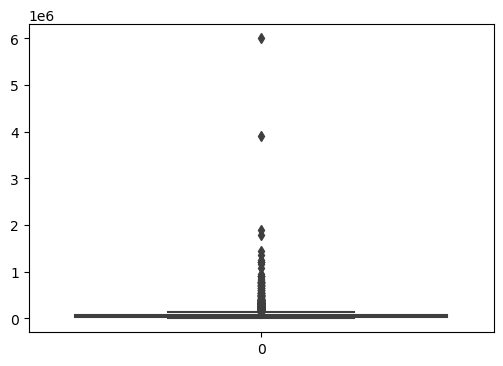

In [25]:
# the boxplot of annual_inc variable.
plt.figure(figsize = [6,4])
sns.boxplot(loan.annual_inc)
plt.show()


In [26]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of annual_inc variable
loan.annual_inc.quantile([0.5, 0.7, 0.9, 0.95, 0.99])


0.50     60000.0
0.70     77000.0
0.90    117242.8
0.95    143950.0
0.99    235000.0
Name: annual_inc, dtype: float64

In [27]:
loan["annual_inc"][loan.annual_inc > 240000].describe()


count    3.520000e+02
mean     4.199938e+05
std      4.217453e+05
min      2.407340e+05
25%      2.700000e+05
50%      3.000000e+05
75%      4.000000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

### Loan Amount

In [28]:
#describe the loan amount variable in loan.
loan.loan_amnt.describe()


count    37823.000000
mean     11328.891151
std       7477.323047
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

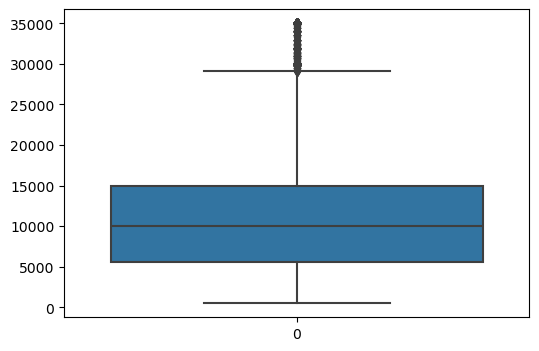

In [29]:
# the boxplot of loan amount variable.
plt.figure(figsize = [6,4])
sns.boxplot(loan.loan_amnt)
plt.show()

In [30]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.782300e+04,3.782300e+04,37823.000000,37823.000000,37823.000000,37823.000000,3.782300e+04,37823.000000,37823.000000,37823.000000,...,37823.000000,37823.000000,37823.000000,37823.0,37823.0,37823.0,37823.0,37823.0,37823.000000,37823.0
mean,6.900628e+05,8.598469e+05,11328.891151,11050.996748,10619.465271,327.161001,6.967727e+04,13.377966,0.145811,0.866642,...,94.574677,12.136955,2731.019060,0.0,1.0,0.0,0.0,0.0,0.041456,0.0
std,2.028915e+05,2.542415e+05,7477.323047,7205.152593,7113.100590,209.098263,6.365142e+04,6.655886,0.490534,1.066497,...,690.484884,148.132518,4490.079929,0.0,0.0,0.0,0.0,0.0,0.200272,0.0
min,5.473400e+04,8.036400e+04,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.211055e+05,6.732465e+05,5600.000000,5500.000000,5000.000000,168.750000,4.190200e+04,8.270000,0.000000,0.000000,...,0.000000,0.000000,224.810000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.694130e+05,8.556700e+05,10000.000000,10000.000000,9200.000000,283.200000,6.000000e+04,13.470000,0.000000,1.000000,...,0.000000,0.000000,563.550000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.393200e+05,1.049090e+06,15000.000000,15000.000000,14608.725420,434.750000,8.355000e+04,18.630000,0.000000,1.000000,...,0.000000,0.000000,3402.630000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### Loan Status

In [31]:
loan.loan_status.value_counts()


loan_status
Fully Paid     31524
Charged Off     5201
Current         1098
Name: count, dtype: int64

In [32]:
round(100*loan.loan_status.value_counts(normalize = True),2)

loan_status
Fully Paid     83.35
Charged Off    13.75
Current         2.90
Name: proportion, dtype: float64

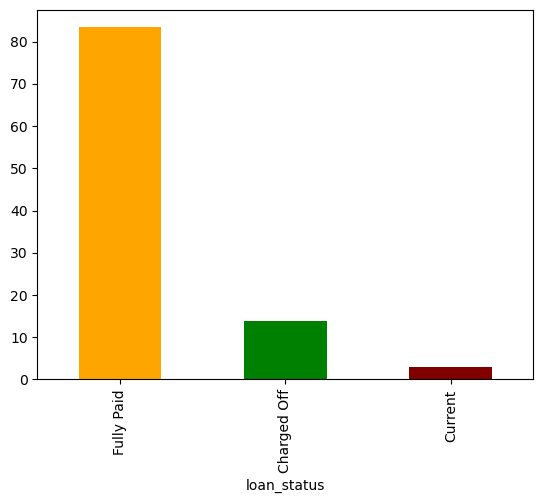

In [33]:
#plot the bar chart of percentage loan status categories
round(100*loan.loan_status.value_counts(normalize = True),2).plot.bar(color = ['orange','green','maroon'])
plt.show()

In [34]:
### Term

In [35]:
loan.term.value_counts()


term
 36 months    27489
 60 months    10334
Name: count, dtype: int64

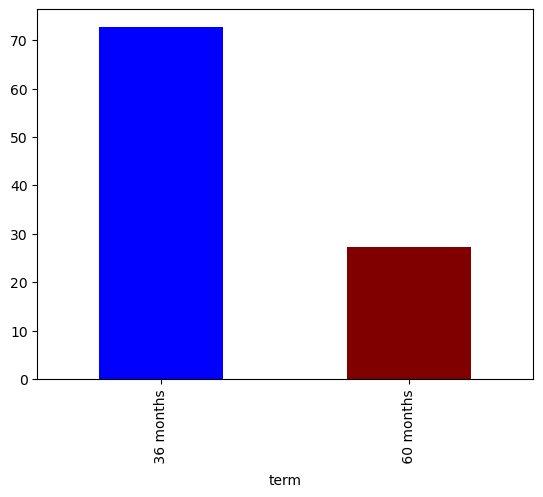

In [36]:
#plot the bar chart of percentage term categories
round(100*loan.term.value_counts(normalize = True),2).plot.bar(color = ['blue','maroon'])
plt.show()

### Home Ownership

In [37]:
loan.home_ownership.value_counts()

home_ownership
RENT        18026
MORTGAGE    16933
OWN          2768
OTHER          96
Name: count, dtype: int64

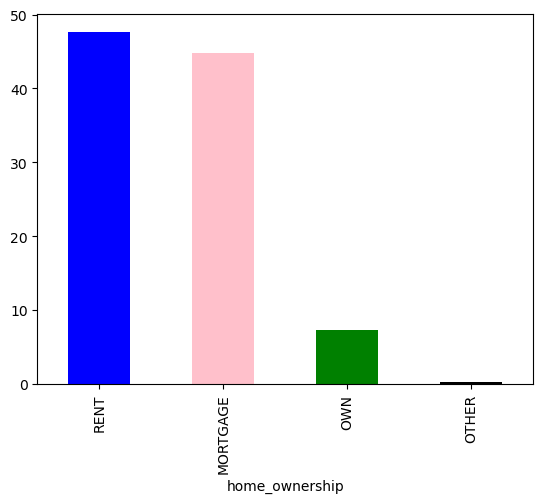

In [38]:
# the bar chart of percentage home_ownership categories
round(100*loan.home_ownership.value_counts(normalize = True),2).plot.bar(color = ['blue','pink','green','black'])
plt.show()


### Verification Status

In [39]:
loan.verification_status.value_counts()


verification_status
Not Verified       15735
Verified           12325
Source Verified     9763
Name: count, dtype: int64

In [40]:
# the percentage of each verification_status category.
round(100 * loan.verification_status.value_counts(normalize = True),2)


verification_status
Not Verified       41.60
Verified           32.59
Source Verified    25.81
Name: proportion, dtype: float64

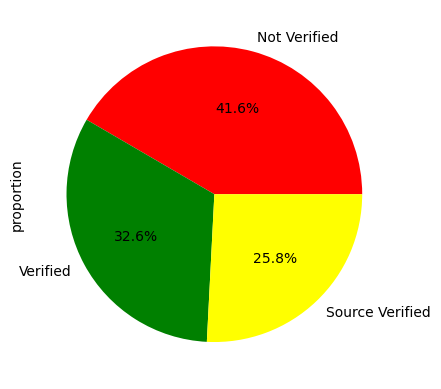

In [41]:
# the pie chart of verification_status categories
round(100 * loan.verification_status.value_counts(normalize = True),2).plot.pie(colors = ['red','green','yellow'], autopct = '%0.1f%%')
plt.show()

### Employment Length (in years)


 Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [42]:
loan.emp_length.value_counts()


emp_length
10+ years    8749
< 1 year     4396
2 years      4291
3 years      4023
4 years      3375
5 years      3233
1 year       3132
6 years      2192
7 years      1746
8 years      1449
9 years      1237
Name: count, dtype: int64

In [43]:
# the percentage of each verification_status category.
round(100 * loan.emp_length.value_counts(normalize = True),2)

emp_length
10+ years    23.13
< 1 year     11.62
2 years      11.34
3 years      10.64
4 years       8.92
5 years       8.55
1 year        8.28
6 years       5.80
7 years       4.62
8 years       3.83
9 years       3.27
Name: proportion, dtype: float64

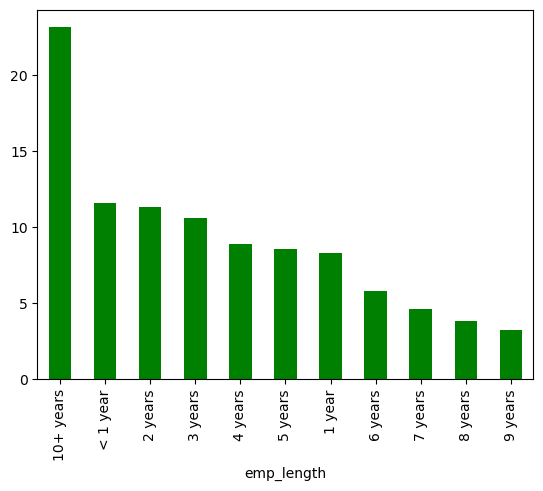

In [44]:
# the bar chart of percentage home_ownership categories
round(100*loan.emp_length.value_counts(normalize = True),2).plot.bar(color = 'g')
plt.show()

### A new dataframe is created where the data of loan status- charged off is present

In [45]:
charged_off = loan[loan.loan_status == 'Charged Off']
charged_off

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.000000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.000000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.000000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.000000,36 months,13.49%,305.38,C,C1,...,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.000000,36 months,10.65%,325.74,B,B2,...,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,246276,246273,10100,10100,6425.004533,36 months,13.55%,343.00,D,D4,...,343.00,Jan-09,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
39291,239690,239649,15450,15450,5650.000000,36 months,13.93%,527.52,E,E1,...,35.74,May-16,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
39362,218343,218321,2150,2150,1574.996529,36 months,10.78%,70.17,C,C1,...,140.34,Mar-10,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
39425,202270,202156,4000,4000,1199.992159,36 months,12.36%,133.55,D,D1,...,133.55,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0


In [46]:
charged_off.shape


(5201, 53)

### Plotting default rates across grade of the loan.

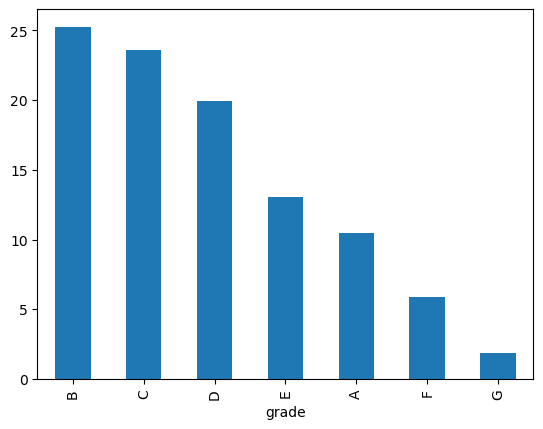

In [47]:
round(100 * charged_off.grade.value_counts(normalize = True),2).plot.bar()
plt.show()

### Plotting default rates across verification status of the loan.

In [48]:

charged_off.verification_status.value_counts(normalize = True)

verification_status
Verified           0.371275
Not Verified       0.363392
Source Verified    0.265334
Name: proportion, dtype: float64

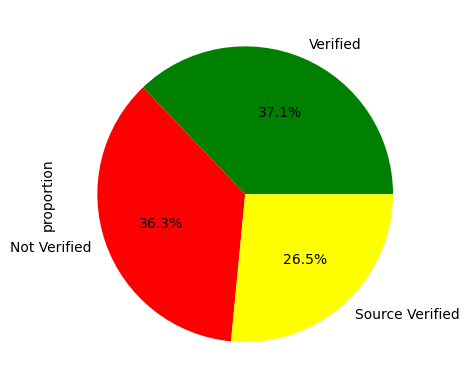

In [49]:
#plot the pie chart of verification_status categories
round(100 * charged_off.verification_status.value_counts(normalize = True),2).plot.pie(colors = ['green','red','yellow'], autopct = '%0.1f%%')
plt.show()


### Plotting default rates across home ownership of the loan.

In [50]:
charged_off.home_ownership.value_counts()


home_ownership
RENT        2619
MORTGAGE    2182
OWN          382
OTHER         18
Name: count, dtype: int64

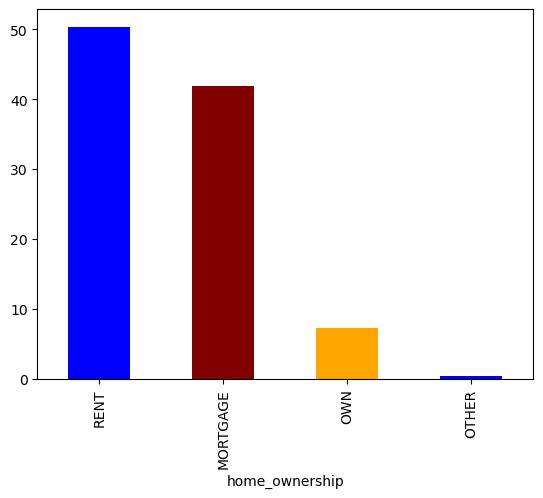

In [51]:
# the bar chart of percentage home_ownership categories
round(100*charged_off.home_ownership.value_counts(normalize = True),2).plot.bar(color = ['blue','maroon','orange','blue'])
plt.show()


### Plotting default rates across delinq_2yrs of the loan.

In [52]:
charged_off.delinq_2yrs.value_counts()

delinq_2yrs
0    4573
1     465
2     119
3      26
4      12
5       3
7       1
6       1
8       1
Name: count, dtype: int64

### lets Create verification_status of numerical data type where 'Not Verified' = 0, else = 1.


In [53]:
charged_off["verification_status"] = charged_off["verification_status"].apply(lambda x: 0 if x=='Not Verified' else 1)
charged_off["verification_status"] = charged_off["verification_status"].apply(lambda x:pd.to_numeric(x))


In [54]:
# Summarizing the values
charged_off["verification_status"].value_counts()


verification_status
1    3311
0    1890
Name: count, dtype: int64

### Emp_length VS verification_Status

<function matplotlib.pyplot.show(close=None, block=None)>

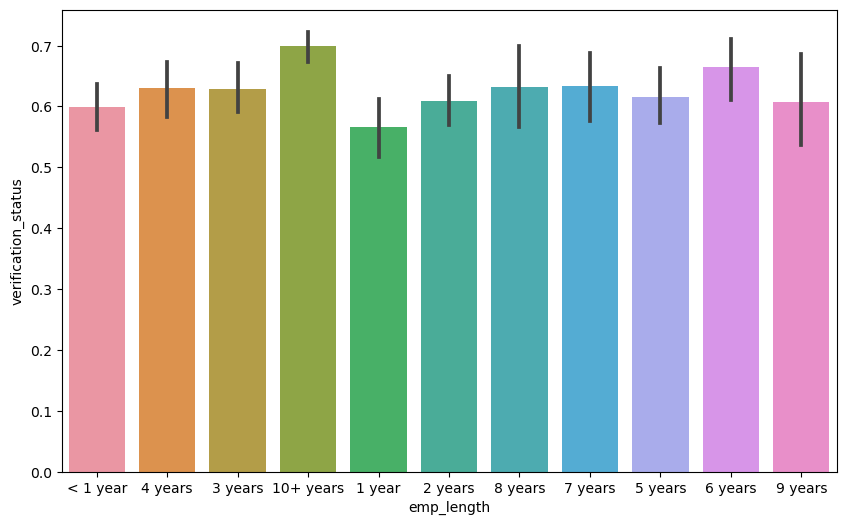

In [55]:
# plotting default rates across emp_length of the loan
plt.figure(figsize = (10,6))
sns.barplot(x = 'emp_length', y = 'verification_status', data = charged_off)
plt.show


### lets Define a function to plot loan_status across categorical variable

In [56]:
def plot_ver(cat_var):
 sns.barplot(x = cat_var, y = 'verification_status', data = charged_off)
 plt.show()


### Home Ownership VS Verification Status


In [57]:
#calculate the mean of verification status with different home ownership.
charged_off.groupby("home_ownership")["verification_status"].mean()

home_ownership
MORTGAGE    0.658570
OTHER       0.444444
OWN         0.594241
RENT        0.625811
Name: verification_status, dtype: float64

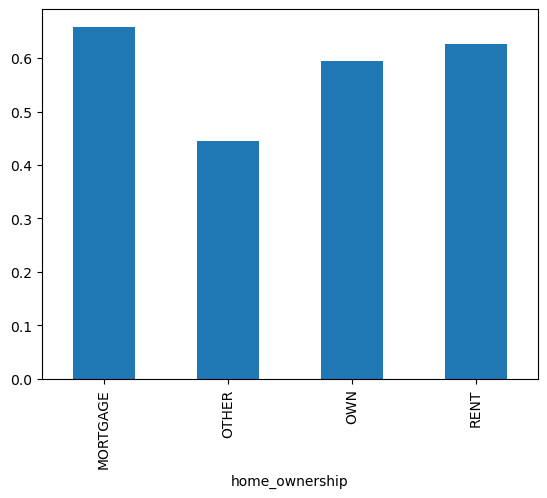

In [58]:
#lets plot the bar graph of home_ownership with average value of verification status
charged_off.groupby("home_ownership")["verification_status"].mean().plot.bar()
plt.show()


### Term VS Verification Status

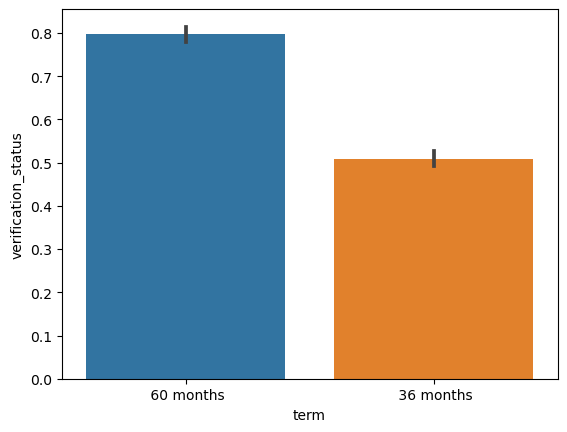

In [59]:
 # lets Compare default rates across term of loan
plot_ver('term')

### Emp_length VS Verification Status


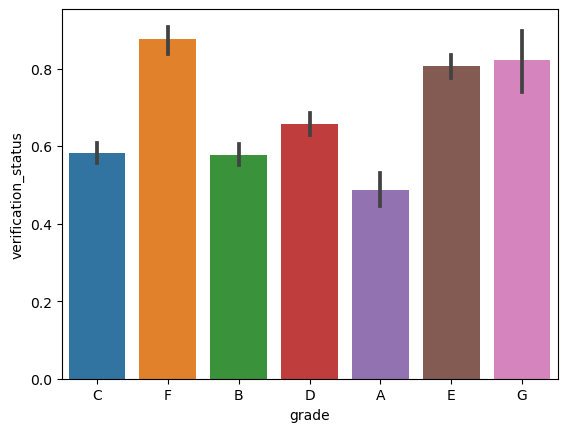

In [60]:

# lets plot the bar chart of emp_length categories
plot_ver('grade')

#### Purpose VS Verification Status

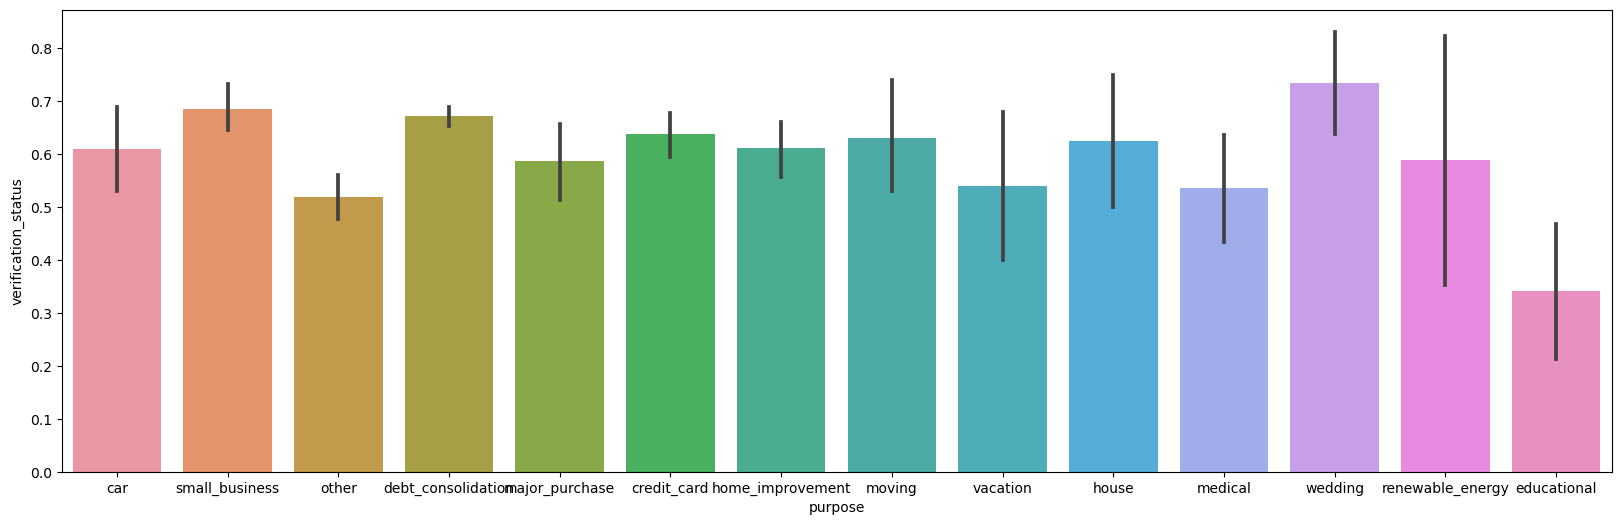

In [61]:
# Compare default rates across purpose of loan
plt.figure(figsize = (20,6))
plot_ver('purpose')

### loan amount: the median loan amount is around 10000

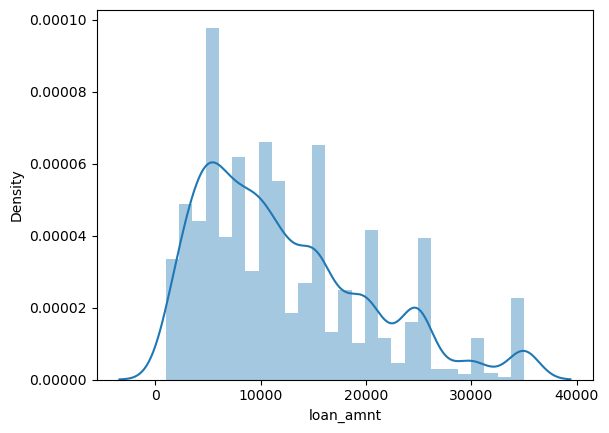

In [62]:
sns.distplot(charged_off['loan_amnt'])
plt.show()

compare the default rates across loan amount type : small, medium, high, very high.

In [63]:
def loan_amount(n):
 if n < 5000:
  return 'low'
 elif n >= 5000 and n < 15000:
  return 'medium'
 elif n >= 15000 and n < 25000:
  return 'high'
 else:
  return 'very high'


In [64]:
charged_off['loan_amnt'] = charged_off['loan_amnt'].apply(lambda x: loan_amount(x))


In [65]:
charged_off['loan_amnt'].value_counts()


loan_amnt
medium       2539
high         1226
low           889
very high     547
Name: count, dtype: int64

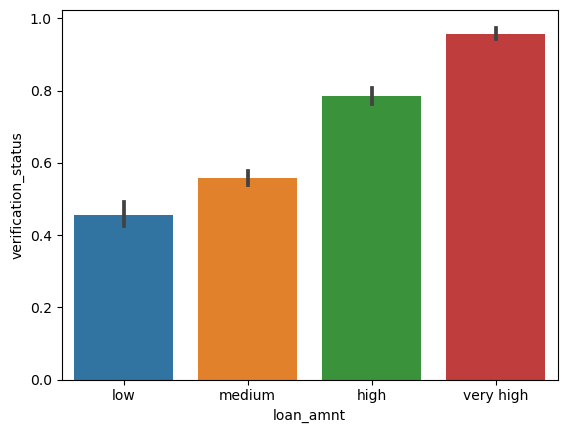

In [66]:
plot_ver('loan_amnt')

### Funded amount invested VS Verification Status

In [67]:
# Convert funded amount invested to bins
charged_off['funded_amnt_inv'] = charged_off['funded_amnt_inv'].apply(lambda x: loan_amount(x))

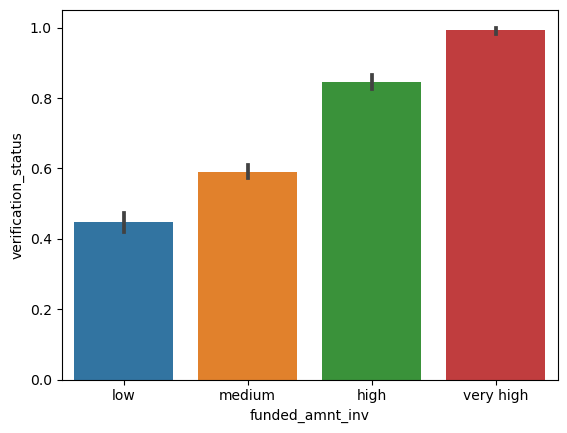

In [68]:
plot_ver('funded_amnt_inv')


### Interest Rate VS Verification Status


In [69]:
 # Remove the percentage symbol and convert to numeric
charged_off['int_rate'] = charged_off['int_rate'].str.rstrip('%').astype(float)


In [70]:
 #lets convert interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <= 15:
        return 'medium'
    else:
        return 'high'


In [71]:
# Convert interest rate invested to bins
charged_off['int_rate'] = charged_off['int_rate'].apply(lambda x: int_rate(x))


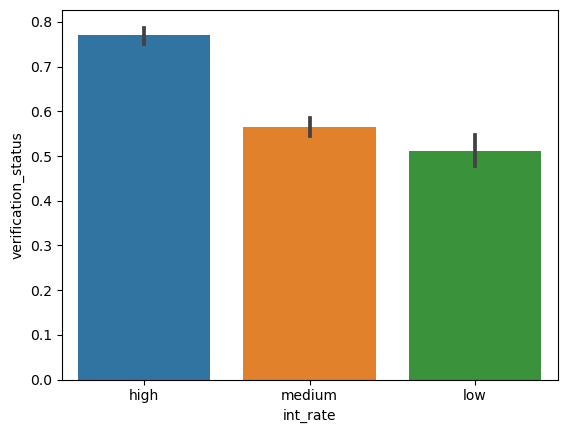

In [72]:
# Comparing default rates across rates of interest
plot_ver('int_rate')

### dti VS Verification Status


In [73]:
#  convert dti to low, medium, high

def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <= 20:
        return 'medium'
    else:
        return 'high'
 
charged_off['dti'] = charged_off['dti'].apply(lambda x: int_rate(x))


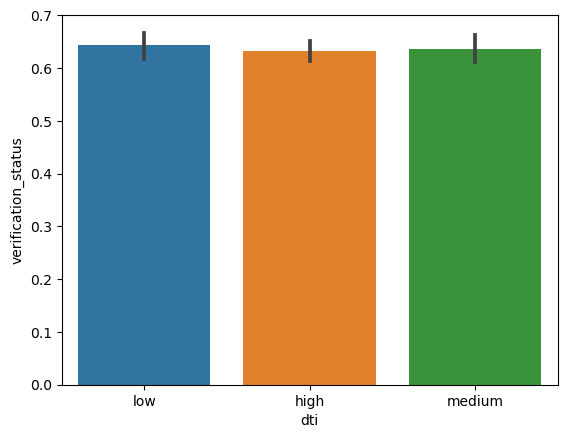

In [74]:
# Comparing default rates across dti
plot_ver('dti')

### Conclusion

### Driving Factors (or driver variables)

(1) Loan Term: Average Interest rate for defaulted applications is very high with 12.38 % for 36 months and 15.75 % for 60 months term.

(2) Grade: Default Rate is high in high risk loan applicants. It would be important for LC to thoroughly vet high risk loan applications.

(3) Loan Amount: Defaulter rate increases as the requested loan amount increases.

(4) Annual Income: Applicants fr90K USD) income group have a greater share of defaulted loans.

(5) Employment Length: Maximum number of defaulters have 10/10+ years of experience and 0 to 2 years of experience. Hence, LC should be take this aspect into consideration while lending loans.

(6) Loan Purpose: The top two reasons for loans are debt consolidation and credit card. Such applications should be careful

(7) Interest Rate:  The higher the installment amount, the higher the default rate. ly assessed.
